# Import library

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

1. __Download Data__

In [81]:

import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/" 
dataset="car.data"
attributes="car.names"
# get data
response = requests.get(url+dataset,allow_redirects=True)
with open(dataset,'wb') as dataset_writer:
    dataset_writer.write(response.content)
raw_dataset = pd.read_csv(dataset,sep=";")
# get attributes
response = requests.get(url+attributes,allow_redirects=True)
with open(attributes,'wb') as attrset_writer:
    attrset_writer.write(response.content)


2.__look at data__

In [82]:
df = pd.read_csv(dataset)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


3.__find column names__

In [83]:
SEARCH_TEXT='7. Attribute Values:'
END_TEXT="8. Missing Attribute Values: none"
with open(attributes,'r') as names:
    content = names.read().splitlines()
    for item in content[content.index(SEARCH_TEXT):content.index(END_TEXT)]:
        print(item)

7. Attribute Values:

   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high



In [84]:
columns_list=['buying_price','maintainance_cost','no_of_doors','persons_capacity','luggage_boot','safety','class']
df.columns = columns_list

 4 __check data types__

In [85]:
df.dtypes

buying_price         object
maintainance_cost    object
no_of_doors          object
persons_capacity     object
luggage_boot         object
safety               object
class                object
dtype: object

In [86]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying_price','maintainance_cost','no_of_doors','persons_capacity','luggage_boot','safety','class'])
df = encoder.fit_transform(df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [87]:
# df['no_of_doors']=['5' if x == '5more' else x for x in df['no_of_doors']  ]
# df['no_of_doors']=df.no_of_doors.astype(int)
# df['persons_capacity']=['6' if x == 'more' else x for x in df['persons_capacity']  ]
# df['persons_capacity']=df.no_of_doors.astype(int)
# df.dtypes

In [88]:
# num_data_buying_price, meta_data_buying_price = pd.factorize(df['buying_price'])
# num_data_maintainance_cost, meta_data_maintainance_cost = pd.factorize(df['maintainance_cost'])
# num_data_luggage_boot, meta_data_luggage_boot = pd.factorize(df['luggage_boot'])
# num_data_safety, meta_data_safety = pd.factorize(df['safety'])
# num_data_class, meta_class = pd.factorize(df['class'])
# df['buying_price'] = num_data_buying_price
# df['maintainance_cost'] = num_data_maintainance_cost
# df['luggage_boot'] = num_data_luggage_boot
# df['safety'] = num_data_safety
# df['class'] = num_data_class

In [89]:
df.dtypes

buying_price         int64
maintainance_cost    int64
no_of_doors          int64
persons_capacity     int64
luggage_boot         int64
safety               int64
class                int64
dtype: object

5. __see statictical info of data__

In [90]:

df.describe()

,buying_price,maintainance_cost,no_of_doors,persons_capacity,luggage_boot,safety,class
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,2.500869,2.500869,2.500869,2.000579,2.000579,1.999421,1.417487
std,1.118098,1.118098,1.118098,0.816615,0.816615,0.816615,0.747337
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000
75%,3.500000,3.500000,3.500000,3.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000


In [91]:
def show_unique_values(data_frame):
    print("Unique value for dataset attributes :\n")
    for column in data_frame.columns:
        print(column, " " ,data_frame[column].unique(), "\n")   
show_unique_values(df)

Unique value for dataset attributes :

buying_price   [1 2 3 4] 

maintainance_cost   [1 2 3 4] 

no_of_doors   [1 2 3 4] 

persons_capacity   [1 2 3] 

luggage_boot   [1 2 3] 

safety   [1 2 3] 

class   [1 2 3 4] 



In [92]:
def show_missing_values(data):
    missing_data = data.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")
show_missing_values(df)

buying_price
False    1727
Name: buying_price, dtype: int64

maintainance_cost
False    1727
Name: maintainance_cost, dtype: int64

no_of_doors
False    1727
Name: no_of_doors, dtype: int64

persons_capacity
False    1727
Name: persons_capacity, dtype: int64

luggage_boot
False    1727
Name: luggage_boot, dtype: int64

safety
False    1727
Name: safety, dtype: int64

class
False    1727
Name: class, dtype: int64



In [93]:
df.isnull().sum()

buying_price         0
maintainance_cost    0
no_of_doors          0
persons_capacity     0
luggage_boot         0
safety               0
class                0
dtype: int64

# Exploratory analysis

1 __fill blank values__

In [94]:
df.fillna(df.mean())

,buying_price,maintainance_cost,no_of_doors,persons_capacity,luggage_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1722,4,4,4,3,2,1,4
1723,4,4,4,3,2,2,3
1724,4,4,4,3,3,3,1
1725,4,4,4,3,3,1,4


2. __drop duplicate values__

In [95]:
df = df.drop_duplicates(keep='first')
df

,buying_price,maintainance_cost,no_of_doors,persons_capacity,luggage_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1722,4,4,4,3,2,1,4
1723,4,4,4,3,2,2,3
1724,4,4,4,3,3,3,1
1725,4,4,4,3,3,1,4


3. __Plot correlation plot using heat map on Initial Data__

<AxesSubplot:>

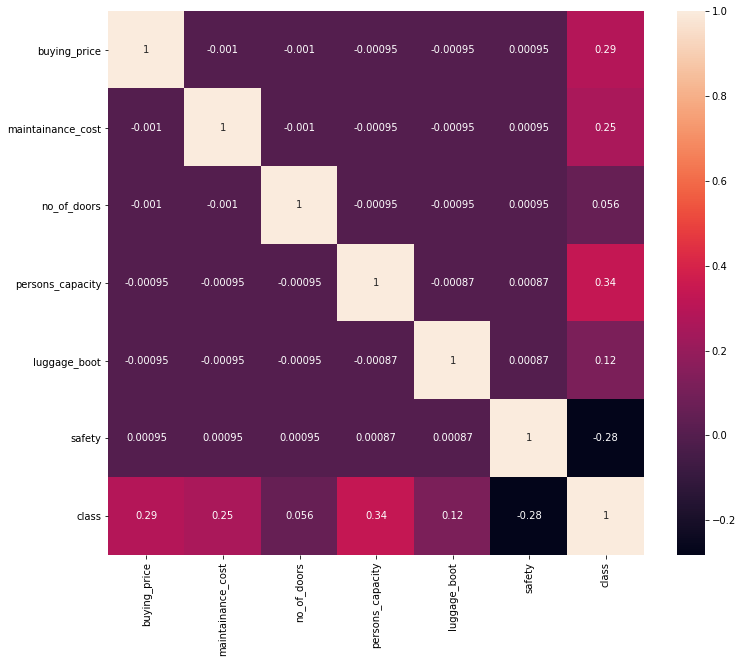

In [96]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

4.__check correlation and remove highly correlated__

In [97]:
def calcDrop(res):
    # All variables with correlation > cutoff
    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    
    # All unique variables in drop column
    poss_drop = list(set(res['drop'].tolist()))

    # Keep any variable not in drop column
    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    # Drop any variables in same row as a keep variable
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    # Remove drop variables from possible drop 
    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    # subset res dataframe to include possible drop pairs
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    # remove rows that are decided (drop), take set and add to drops
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop

def corrX_new(df, cut) :
       
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))
    
    dropcols = list()
    
    res = pd.DataFrame(columns=(['v1', 'v2', 'v1.target', 
                                 'v2.target','corr', 'drop' ]))
    
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([ corr_mtx.index[row],
                up.columns[col],
                avg_corr[row],
                avg_corr[col],
                up.iloc[row,col],
                drop],
                index = res.columns)
        
                res = res.append(s, ignore_index = True)
    
    dropcols_names = calcDrop(res)
    
    return(dropcols_names)


drop = corrX_new(df, cut = 0.70)

for x in drop:
    df.drop([x], axis=1, inplace=True)

<AxesSubplot:>

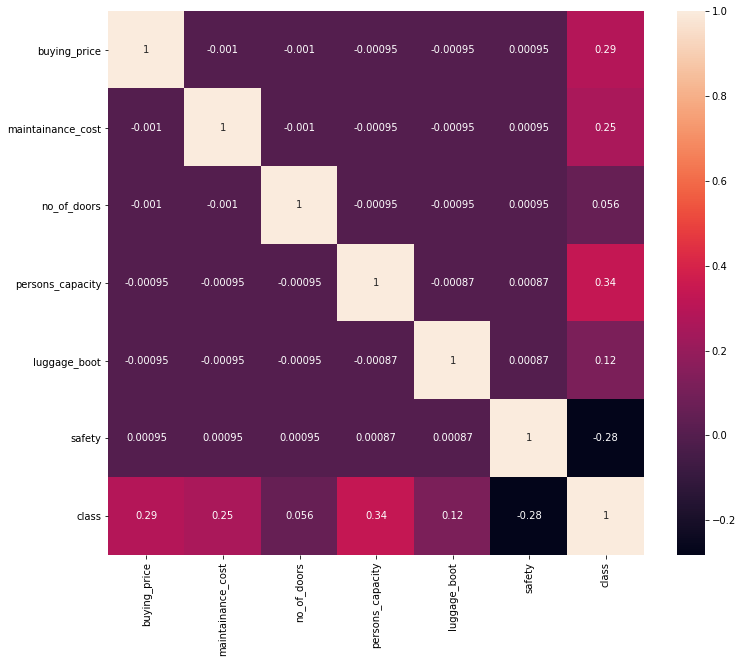

In [98]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

# train and test split data

In [99]:
X = df[['buying_price', 'maintainance_cost', 'no_of_doors', 'luggage_boot',
       'safety']]
Y = df['class']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

create model and apply

In [101]:
from sklearn.ensemble import RandomForestClassifier 

In [102]:
randomforest = RandomForestClassifier(n_estimators=100,random_state=100)

In [103]:
randomforest.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [104]:
predictions = randomforest.predict(X_test)

check classification report

In [105]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print ("Accuracy : ", accuracy_score(y_test,predictions)*100, "\n") 

[[310  66  10  13]
 [ 55  70   1   1]
 [ 11   1  12   2]
 [  8   0   0  10]]
              precision    recall  f1-score   support

           1       0.81      0.78      0.79       399
           2       0.51      0.55      0.53       127
           3       0.52      0.46      0.49        26
           4       0.38      0.56      0.45        18

    accuracy                           0.71       570
   macro avg       0.56      0.59      0.57       570
weighted avg       0.71      0.71      0.71       570

Accuracy :  70.52631578947368 



# important attributes

<AxesSubplot:>

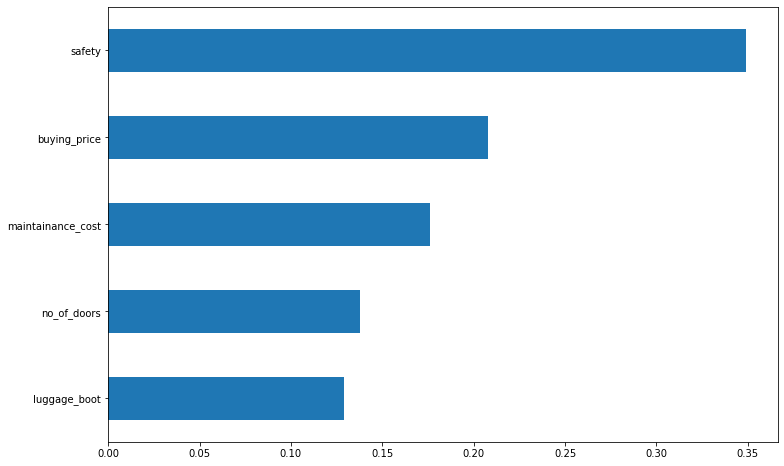

In [106]:
importances=pd.Series(randomforest.feature_importances_, index=X.columns).sort_values()
importances.plot(kind='barh', figsize=(12,8))

# Feature selection

In [107]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [108]:
def show_top_univariate_filters(data, score_func, top_k):
    X = data.iloc[:,0:20]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    if score_func == "chi2":
        func = chi2
    elif score_func == "f_classif":
        func = f_classif
    elif score_func == "mutual_info_classif":
        func = mutual_info_classif
    
    #apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=func, k=top_k)
    fit = bestfeatures.fit(X,y)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(top_k,'Score'))  #print 10 best features

In [109]:
show_top_univariate_filters(df, 'chi2', 5)

               Specs       Score
6              class  680.071078
3   persons_capacity   88.807133
0       buying_price   80.534340
5             safety   72.884311
1  maintainance_cost   59.978306


In [110]:
show_top_univariate_filters(df, 'f_classif', 5)

               Specs       Score
6              class         inf
3   persons_capacity  104.834882
5             safety   83.256528
0       buying_price   59.127704
1  maintainance_cost   42.908098


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


__correlation matrix__

In [111]:
df.corr()

,buying_price,maintainance_cost,no_of_doors,persons_capacity,luggage_boot,safety,class
buying_price,1.000000,-0.001043,-0.001043,-0.000952,-0.000952,0.000952,0.286273
maintainance_cost,-0.001043,1.000000,-0.001043,-0.000952,-0.000952,0.000952,0.254378
no_of_doors,-0.001043,-0.001043,1.000000,-0.000952,-0.000952,0.000952,0.056075
persons_capacity,-0.000952,-0.000952,-0.000952,1.000000,-0.000869,0.000869,0.336622
luggage_boot,-0.000952,-0.000952,-0.000952,-0.000869,1.000000,0.000869,0.121120
safety,0.000952,0.000952,0.000952,0.000869,0.000869,1.000000,-0.281560
class,0.286273,0.254378,0.056075,0.336622,0.121120,-0.281560,1.000000


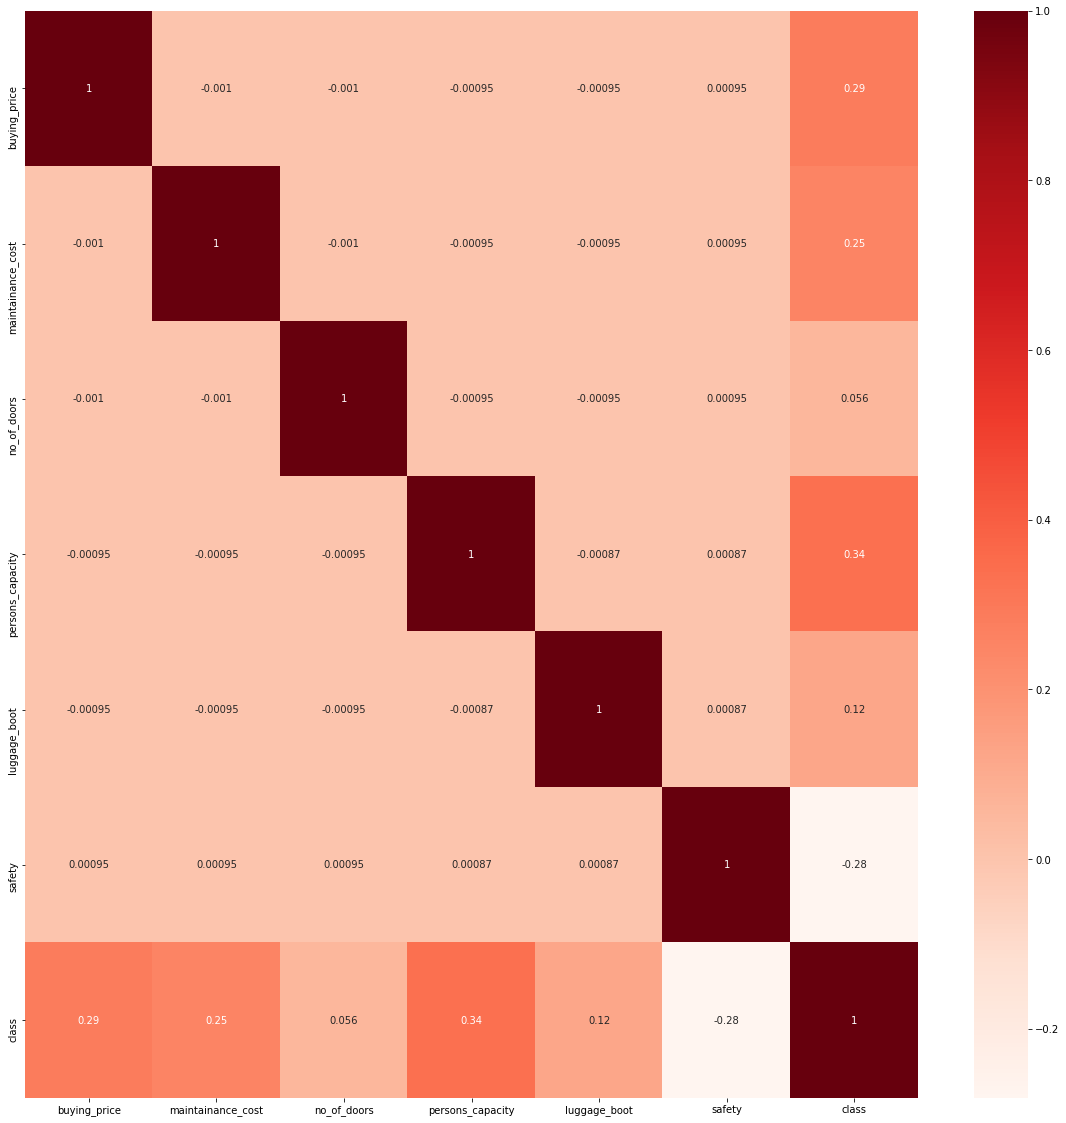

In [112]:
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index

#plot heat map
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [113]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
def get_top_k_features_by_mlxtend(data, dt, top_k, forward=True, cv_cnt=0, show_results=True):
    #Preprare the independant and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length-1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range
    
    #Prepare a model using the specified feature selection method 
    sfs_model = SFS(dt, 
                   k_features=top_k, 
                   forward=forward, 
                   floating=False, 
                   verbose=2,
                   scoring='accuracy',
                   cv=cv_cnt)
    
    #Lets fit the model and identify the features
    sfs_model = sfs_model.fit(X, y)
    
    #Show outcomes
    #print("Subsets : \n", sfs_model.subsets_ , "\n")
    if show_results:
        print("Score : " , sfs_model.k_score_, "\n")
        print("Top" , top_k , " Feature Names : " , sfs_model.k_feature_names_, "\n")
    
    return sfs_model
get_top_k_features_by_mlxtend(df, randomforest, 5, forward=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Score :  0.9617834394904459 

Top 5  Feature Names :  ('buying_price', 'maintainance_cost', 'persons_capacity', 'luggage_boot', 'safety') 



[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s finished

[2021-01-02 19:16:16] Features: 5/5 -- score: 0.9617834394904459

SequentialFeatureSelector(cv=0,
                          estimator=RandomForestClassifier(random_state=100),
                          forward=False, k_features=5, scoring='accuracy',
                          verbose=2)

In [114]:
get_top_k_features_by_mlxtend(df, randomforest, 5, forward=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.2s finished

[2021-01-02 19:16:17] Features: 1/5 -- score: 0.7000579038795599[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished

[2021-01-02 19:16:18] Features: 2/5 -- score: 0.7023740590619572[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s finished

[2021-01-02 19:16:19] Features: 3/5 -- score: 0.8193398957730168[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Score :  0.9617834394904459 

Top 5  Feature Names :  ('buying_price', 'maintainance_cost', 'persons_capacity', 'luggage_boot', 'safety') 



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s finished

[2021-01-02 19:16:20] Features: 5/5 -- score: 0.9617834394904459

SequentialFeatureSelector(cv=0,
                          estimator=RandomForestClassifier(random_state=100),
                          k_features=5, scoring='accuracy', verbose=2)

In [115]:
from sklearn.feature_selection import RFE
def get_top_k_features_by_rfe(data, dt, top_k, show_results=True):
    #Preprare the independant and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length-1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    #Initializing RFE model
    rfe = RFE(dt, top_k)

    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X,y)  
    
    #Fitting the data to model
    model = dt.fit(X_rfe,y)
    
    #Prepare top k feature list 
    indx= 0 
    feature_list = []
    for col in X.columns:
        if rfe.ranking_[indx] == 1:
            feature_list.append(col)
        indx = indx + 1
    
    if show_results:
        print("Num Features: %d\n" % rfe.n_features_)
        print("Selected Features :" , feature_list)
        #print("Feature Ranking: %s" % rfe.ranking_)  

    return feature_list
get_top_k_features_by_rfe(df, randomforest, 5, show_results=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Num Features: 5

Selected Features : ['buying_price', 'maintainance_cost', 'persons_capacity', 'luggage_boot', 'safety']


['buying_price',
 'maintainance_cost',
 'persons_capacity',
 'luggage_boot',
 'safety']

In [116]:
del df['no_of_doors']

# Apply PCA


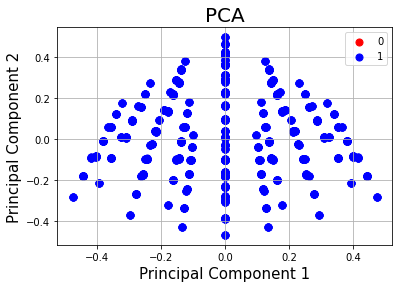

In [117]:
from sklearn.decomposition import PCA 

def apply_pca_and_get_final_df(df,target,show_graph=True):
    X = df.drop([target], axis=1)
    y = df[target]
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X.values)
    principalDf = pd.DataFrame(data=principalComponents
                               , columns=['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, y], axis=1)
    if show_graph:
        fig, ax = plt.subplots()
        ax.set_xlabel('Principal Component 1', fontsize=15)
        ax.set_ylabel('Principal Component 2', fontsize=15)
        ax.set_title('PCA', fontsize=20)
        targets = [0, 1]
        colors = ['r', 'b']
        for target, color in zip(targets, colors):
            indicesToKeep = finalDf['class'] == target
            ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                       , finalDf.loc[indicesToKeep, 'principal component 2']
                       , c=color
                       , s=50)
        ax.legend(targets)
        ax.grid() 
    return finalDf

from sklearn.preprocessing import Normalizer
scaler = Normalizer()
df.loc[:, df.columns != 'class'] = scaler.fit_transform(df.loc[:, df.columns != 'class'])

final_df = apply_pca_and_get_final_df(df,'class')

# Again Apply RandomForest model 

In [118]:
finalDf = pd.DataFrame(df).fillna(df.mean())
X = finalDf.drop(['class'], axis=1)
Y = finalDf['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 )
randomforest_after_pca = RandomForestClassifier(n_estimators=200,random_state=100)
randomforest_after_pca.fit(X_train,y_train)
predictions = randomforest_after_pca.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print ("Accuracy : ", accuracy_score(y_test,predictions)*100, "\n") 

[[336  13   0   0]
 [  8 105   1   7]
 [  0   5  17   2]
 [  4   2   2  17]]
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       349
           2       0.84      0.87      0.85       121
           3       0.85      0.71      0.77        24
           4       0.65      0.68      0.67        25

    accuracy                           0.92       519
   macro avg       0.83      0.80      0.81       519
weighted avg       0.92      0.92      0.92       519

Accuracy :  91.52215799614643 

